Fraud Detection
Colloborators="Harshit Shukla
                Nikhil Khaladkar
                Pranav Kalbhor
                Siddish Rao"



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC

In [3]:
creditdata_info=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

Describe the data and the describe.

In [4]:
creditdata_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
creditdata_info.shape

(284807, 31)

The credit data has 284807 row entries and 31 attributes.
Printing the data in the following cell to get the idea of some entries in the data.

In [6]:
creditdata_info.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


So in the data we have Time and Amount as two columns and V1 to V28 as the credit card data entries Class is our predicate and defines whether the given transaction is fradulent or not.

Lets find out whether there are any null values in the dataset.

In [7]:
creditdata_info.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

The data has not null values which is a positive thing. Lets find out if there is any categorical data present in this data.



In [8]:
non_numerical=creditdata_info.select_dtypes(include=['object'])
non_numerical.columns

Index([], dtype='object')

The above code shows that there are no categorical columns. So we can use this data for the models without having to convert the categorical data into encodings.

Now let's find out the distribution of the data using hthe histogram.

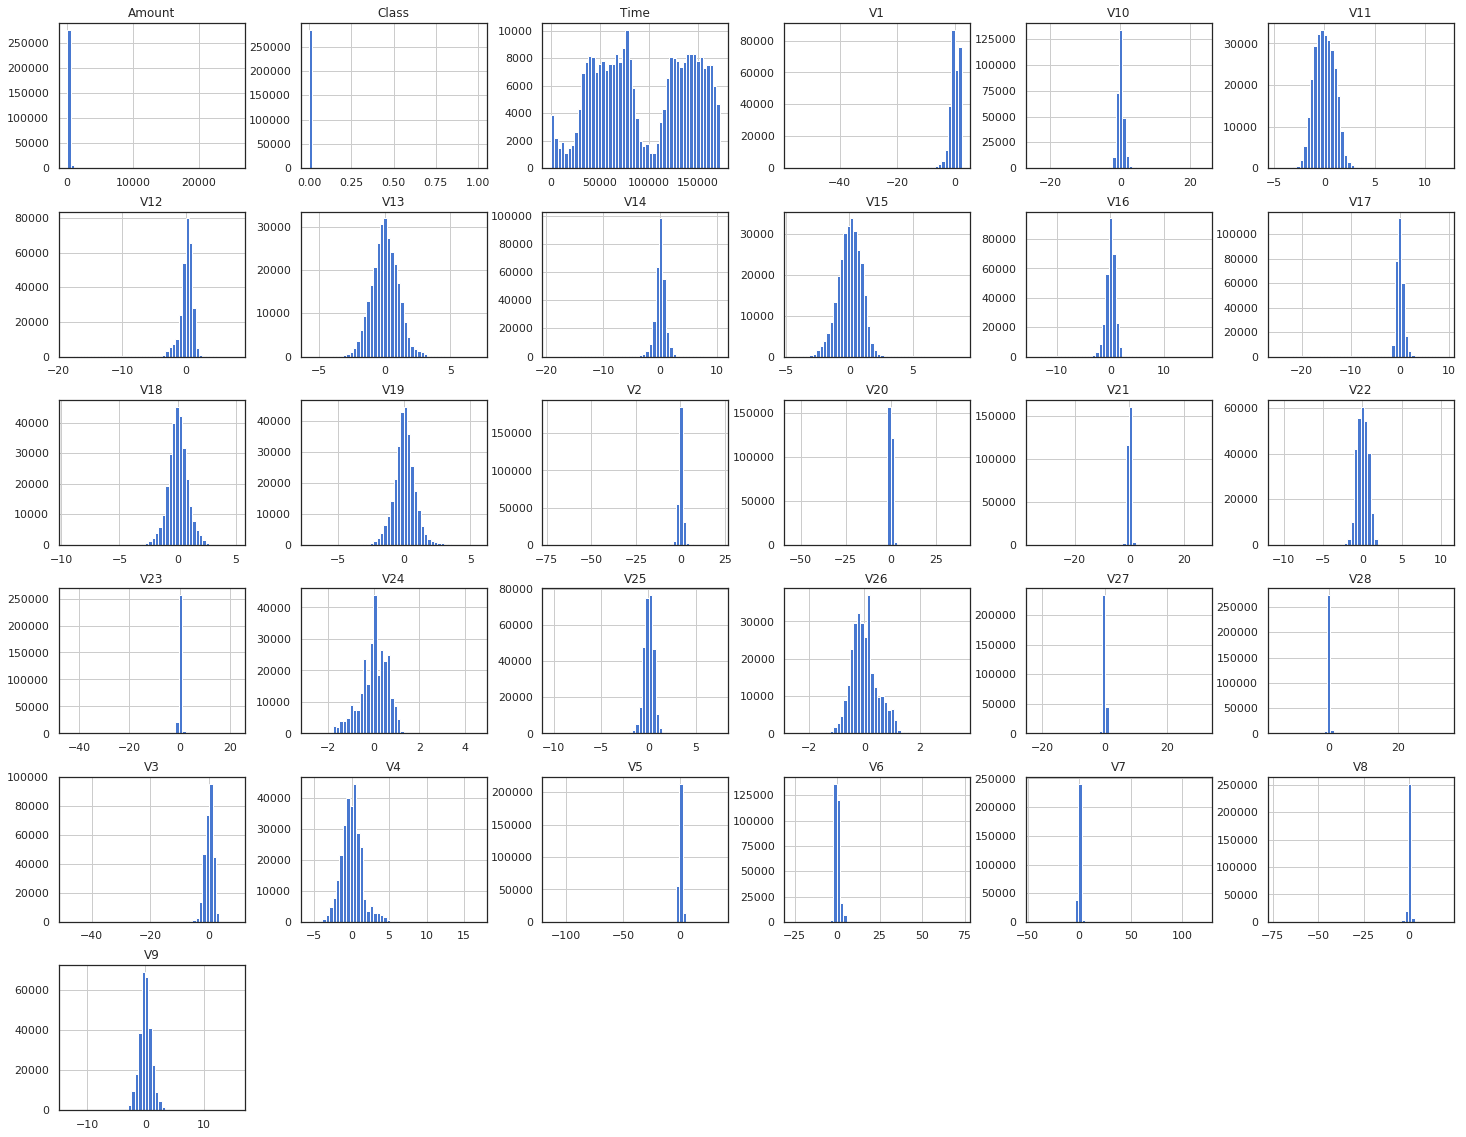

In [9]:
sns.set(color_codes=True)
sns.set(style="white", palette="muted")


axes=creditdata_info.hist(bins=50,figsize=(25,20))


plt.savefig('Credit Data Distribution.png')


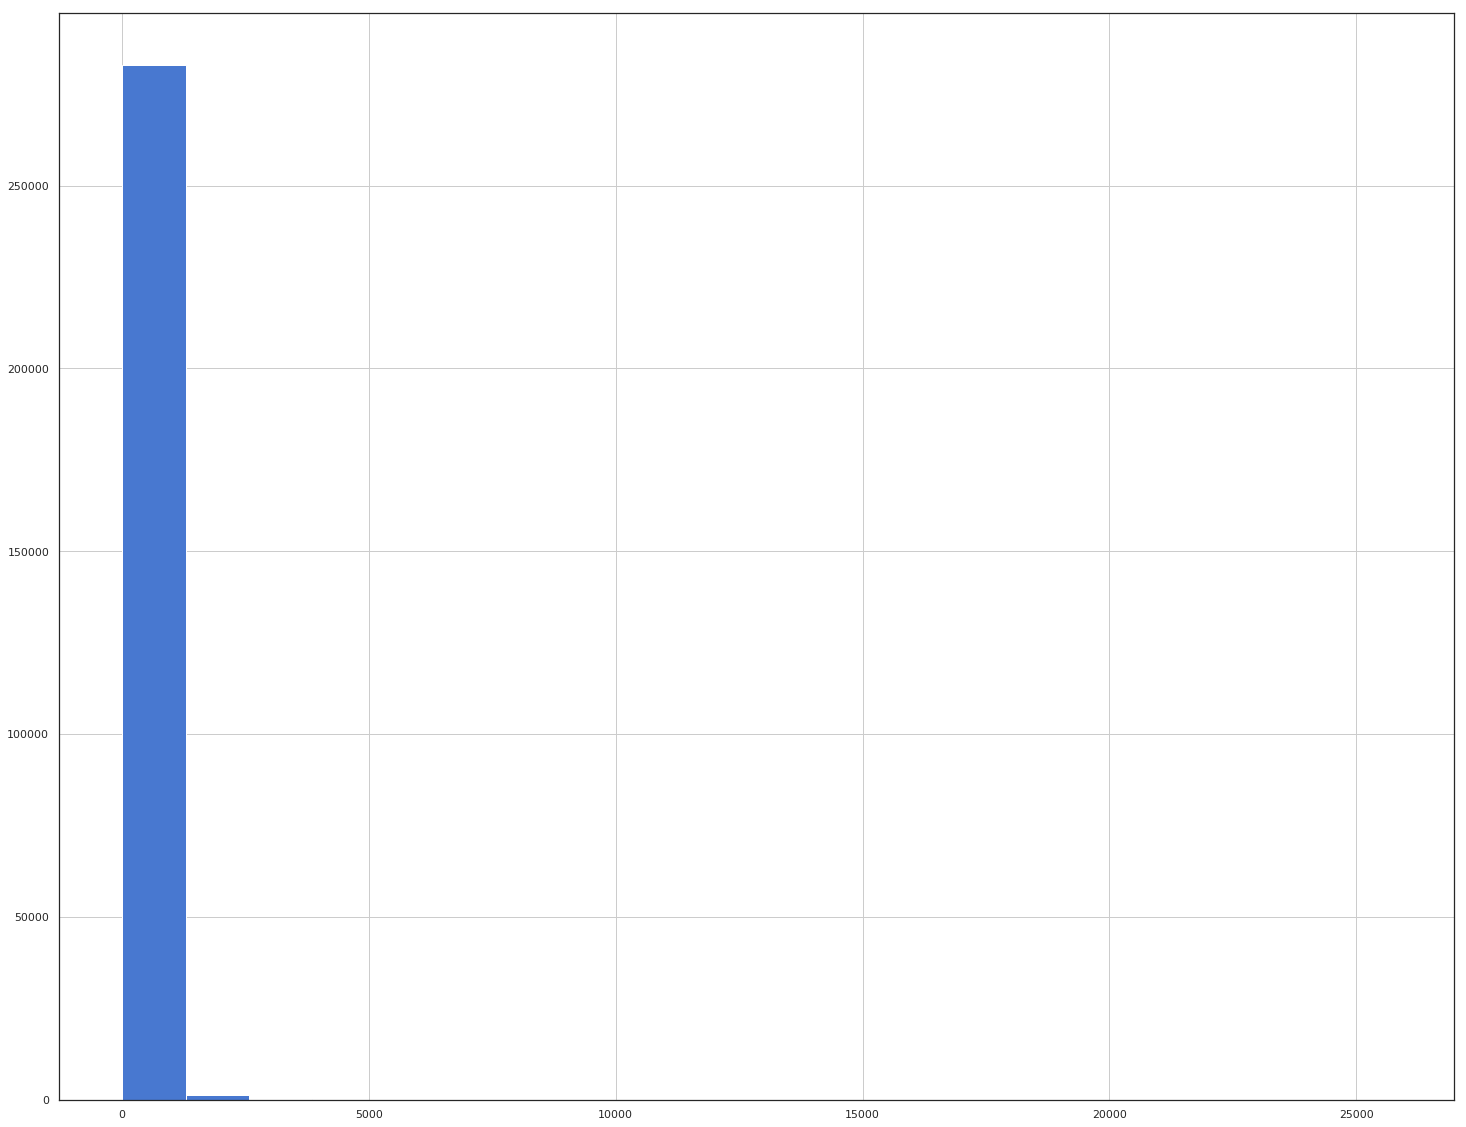

In [10]:
sns.set(color_codes=True)
sns.set(style="white", palette="muted")


axes=creditdata_info['Amount'].hist(bins=20,figsize=(25,20))

We have the following observations from the above the above histogram:
- The distribution for amount and class are similar looking.
- The time graph is well distributed.
- The V13 and V14 have normalized distribution
- Many attributes have skewed distributions.


It will be interesting to see how the distributions of the amount, time and class attributes. So lets see if we get any more information on this.

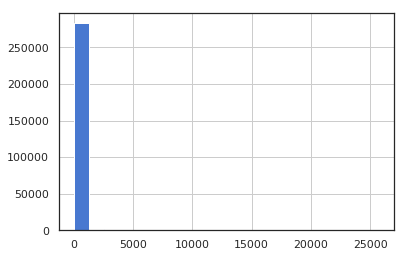

In [11]:
sns.set(color_codes=True)
sns.set(style="white", palette="muted")


axes=creditdata_info['Amount'].hist(bins=20)

plt.show()


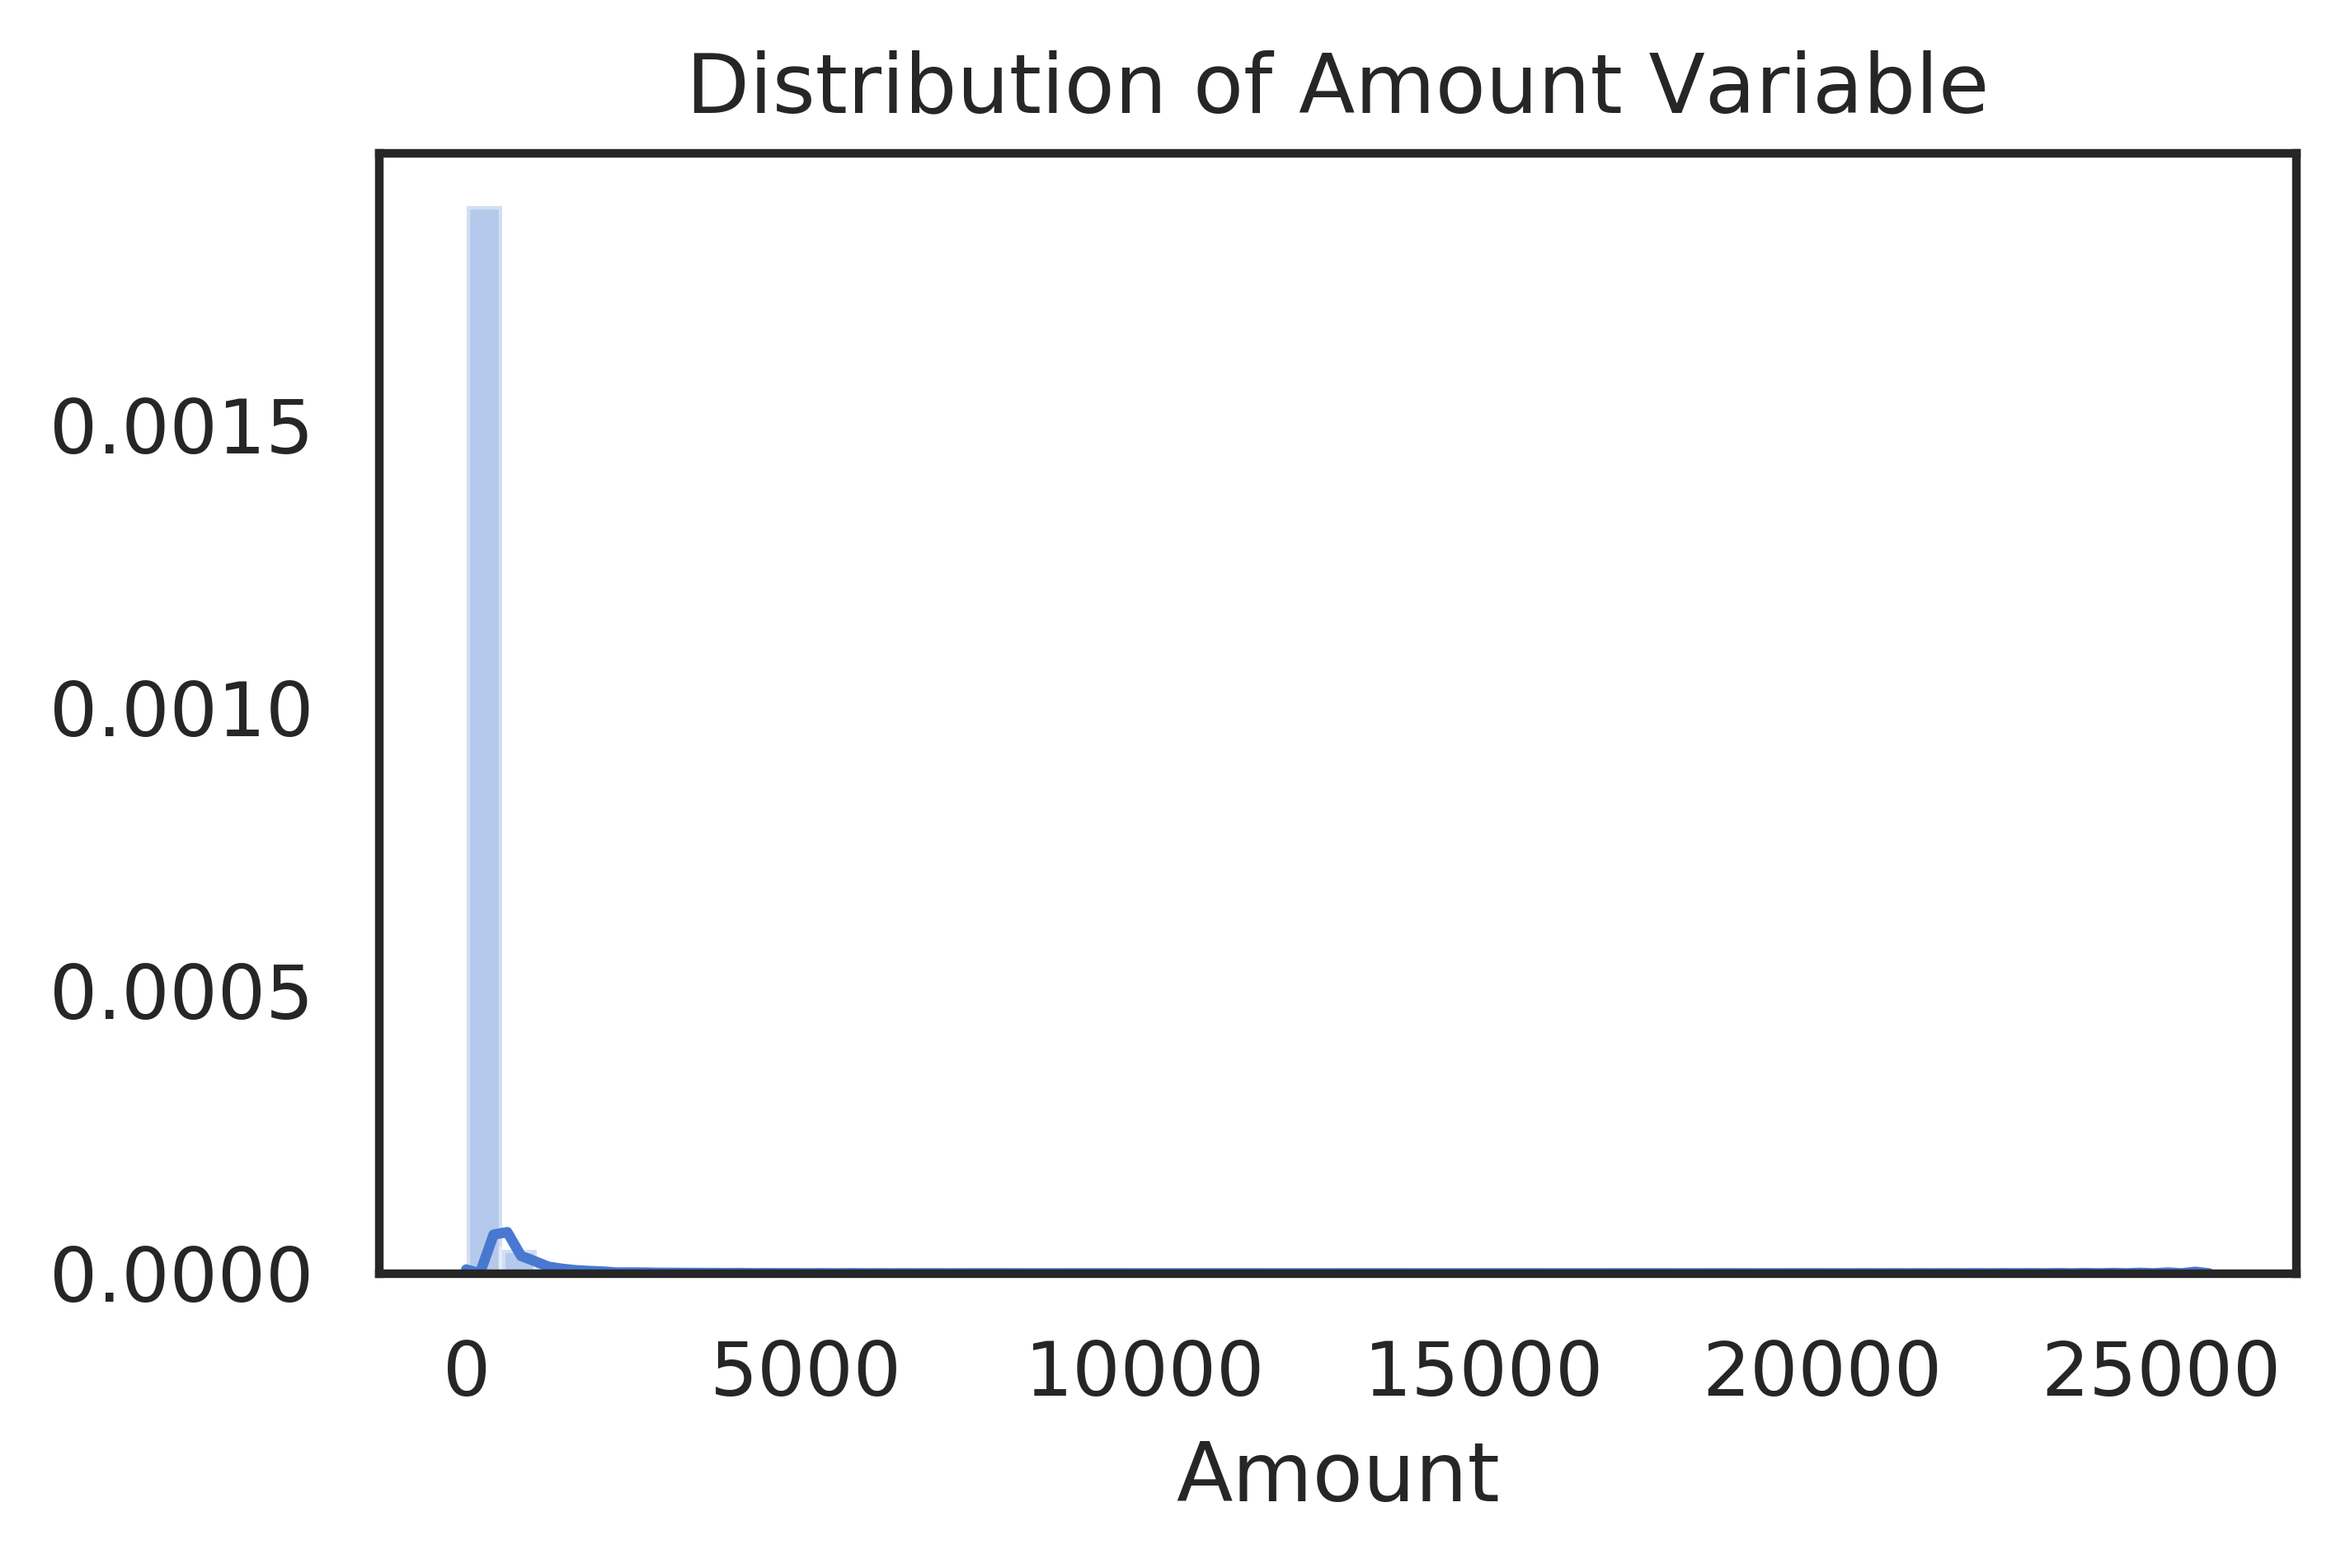

In [12]:
sns.set(color_codes=True)
sns.set(style="white", palette="muted")



fig=plt.figure(figsize=(5,3),dpi=600)
plt.xlabel('Amount',fontsize=12)
plt.title('Distribution of Amount Variable',fontsize=12)
sns.distplot(creditdata_info['Amount'],kde=True)
fig.savefig('AmountDistPlot.png')

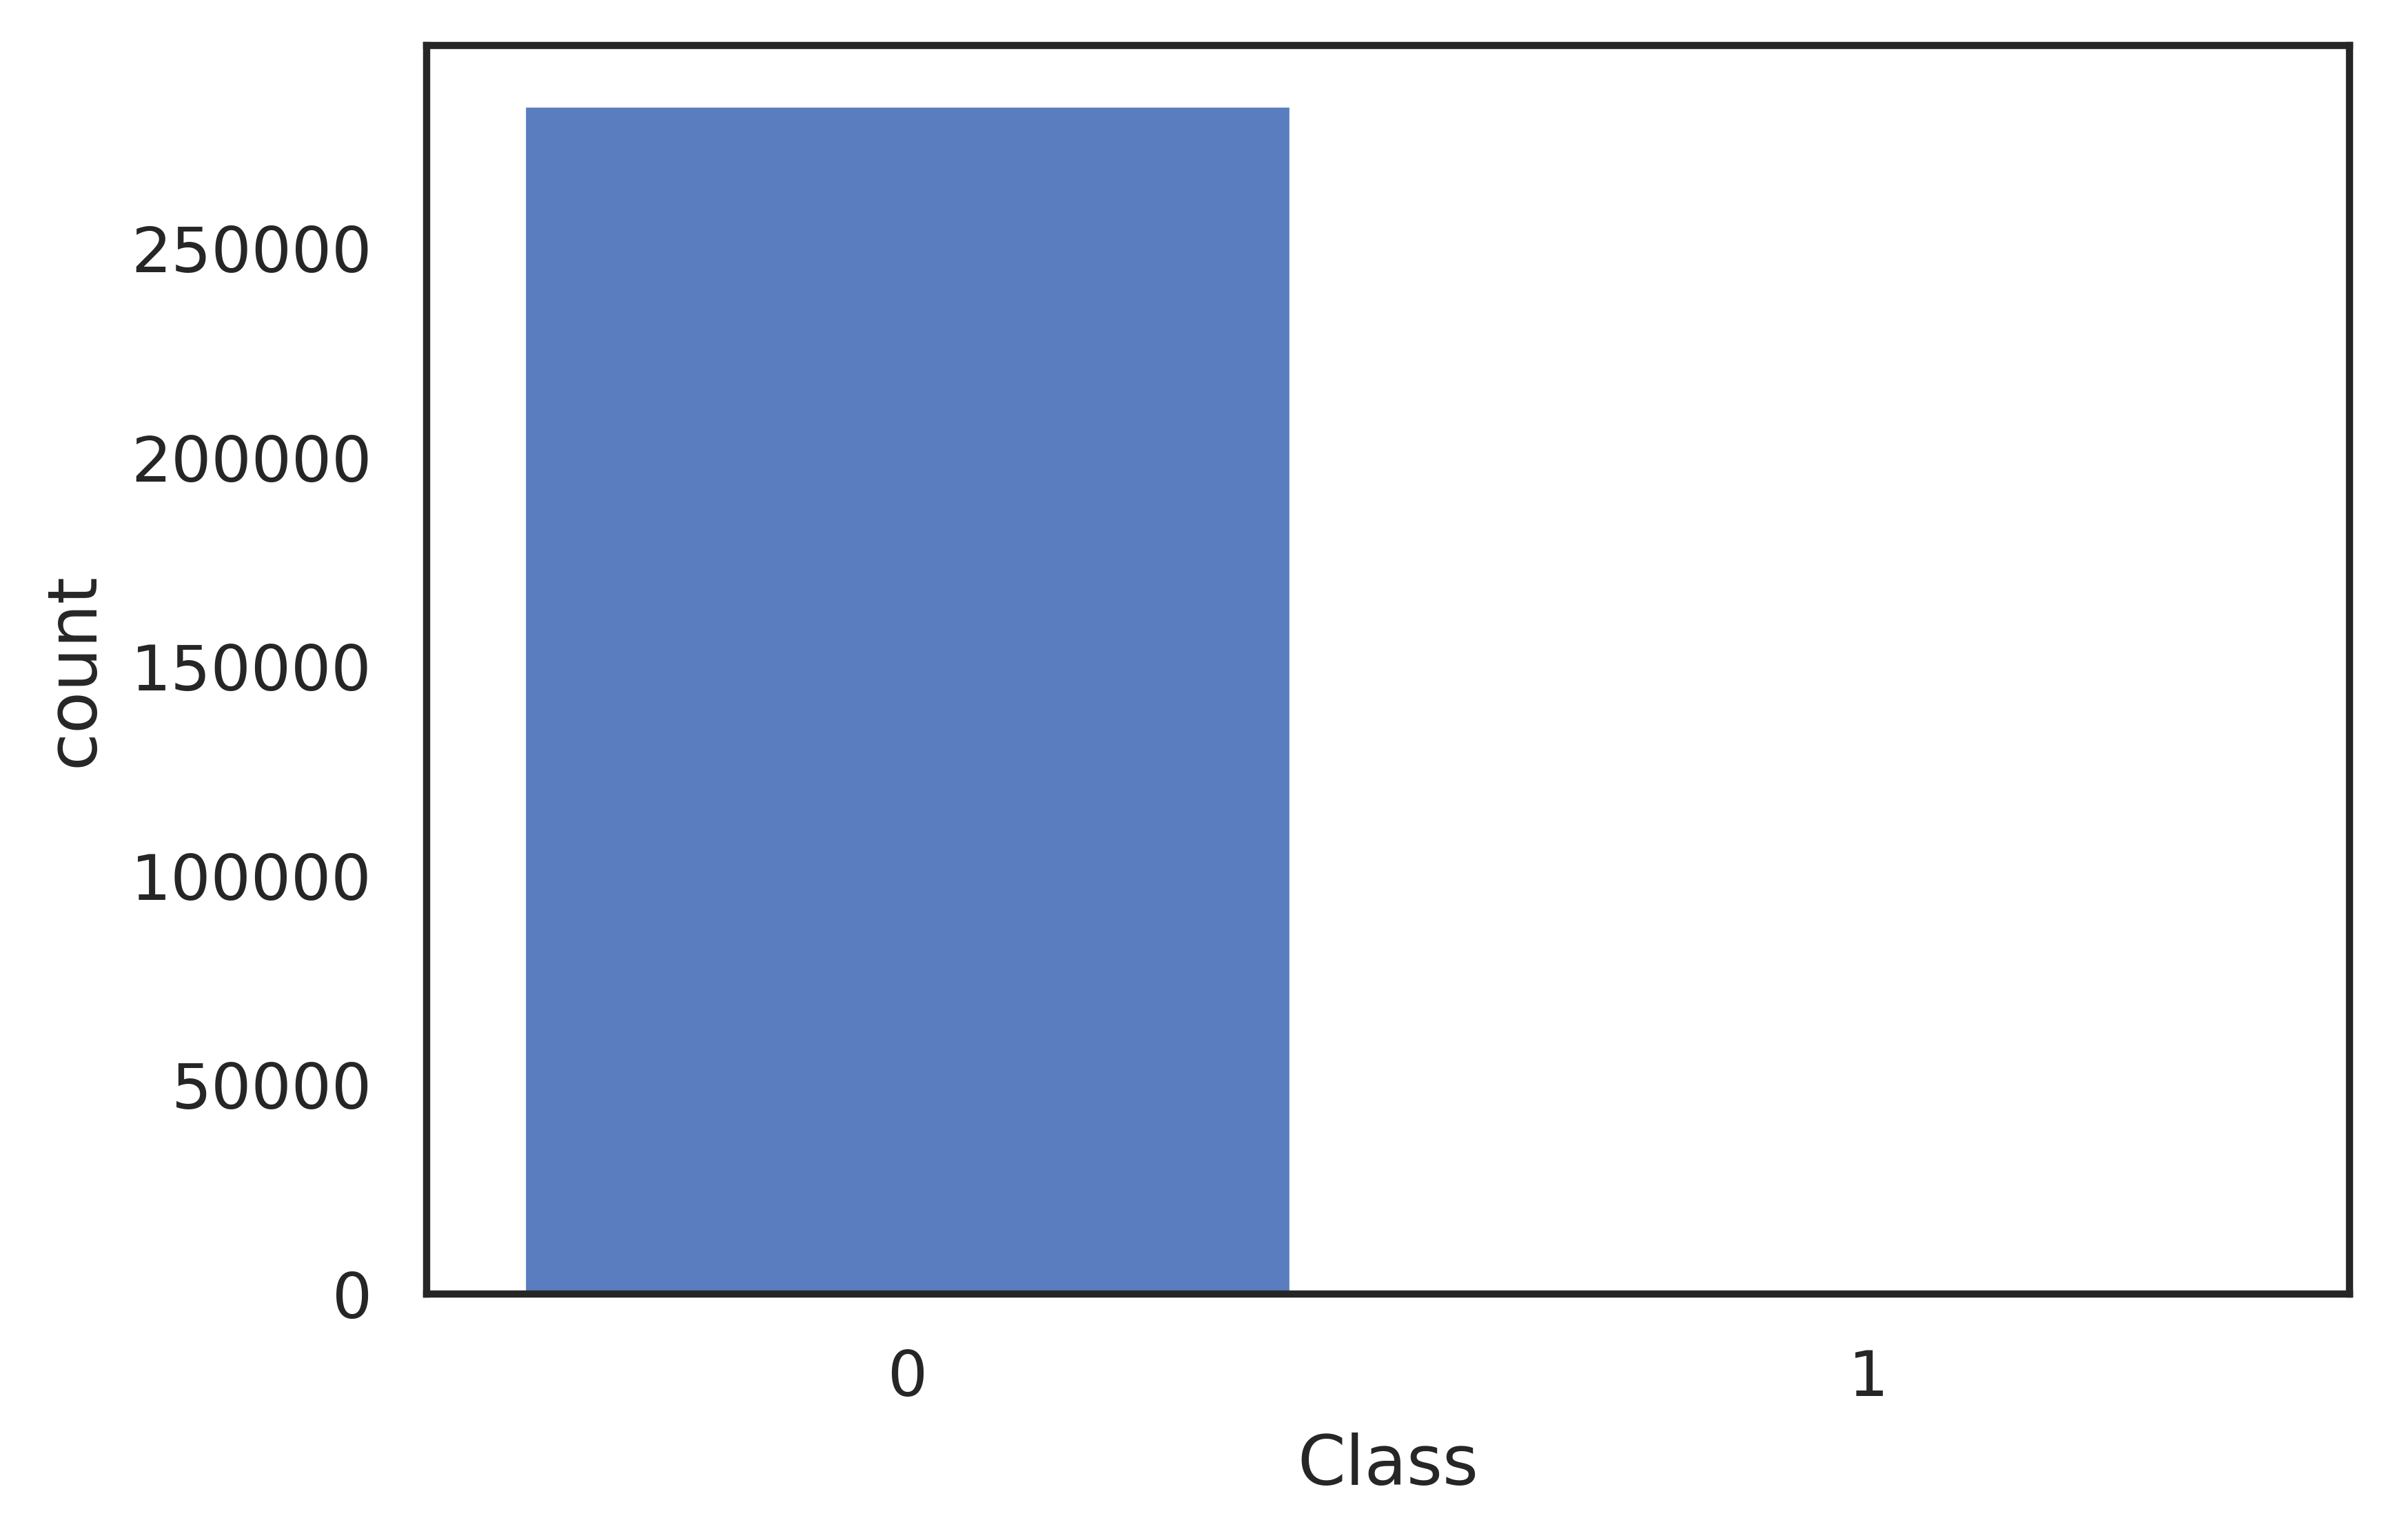

In [13]:
fig=plt.figure(dpi=600)
sns.countplot('Class',data=creditdata_info)




Lets see the scatterplot to see the scattering of the class data over time.

[]

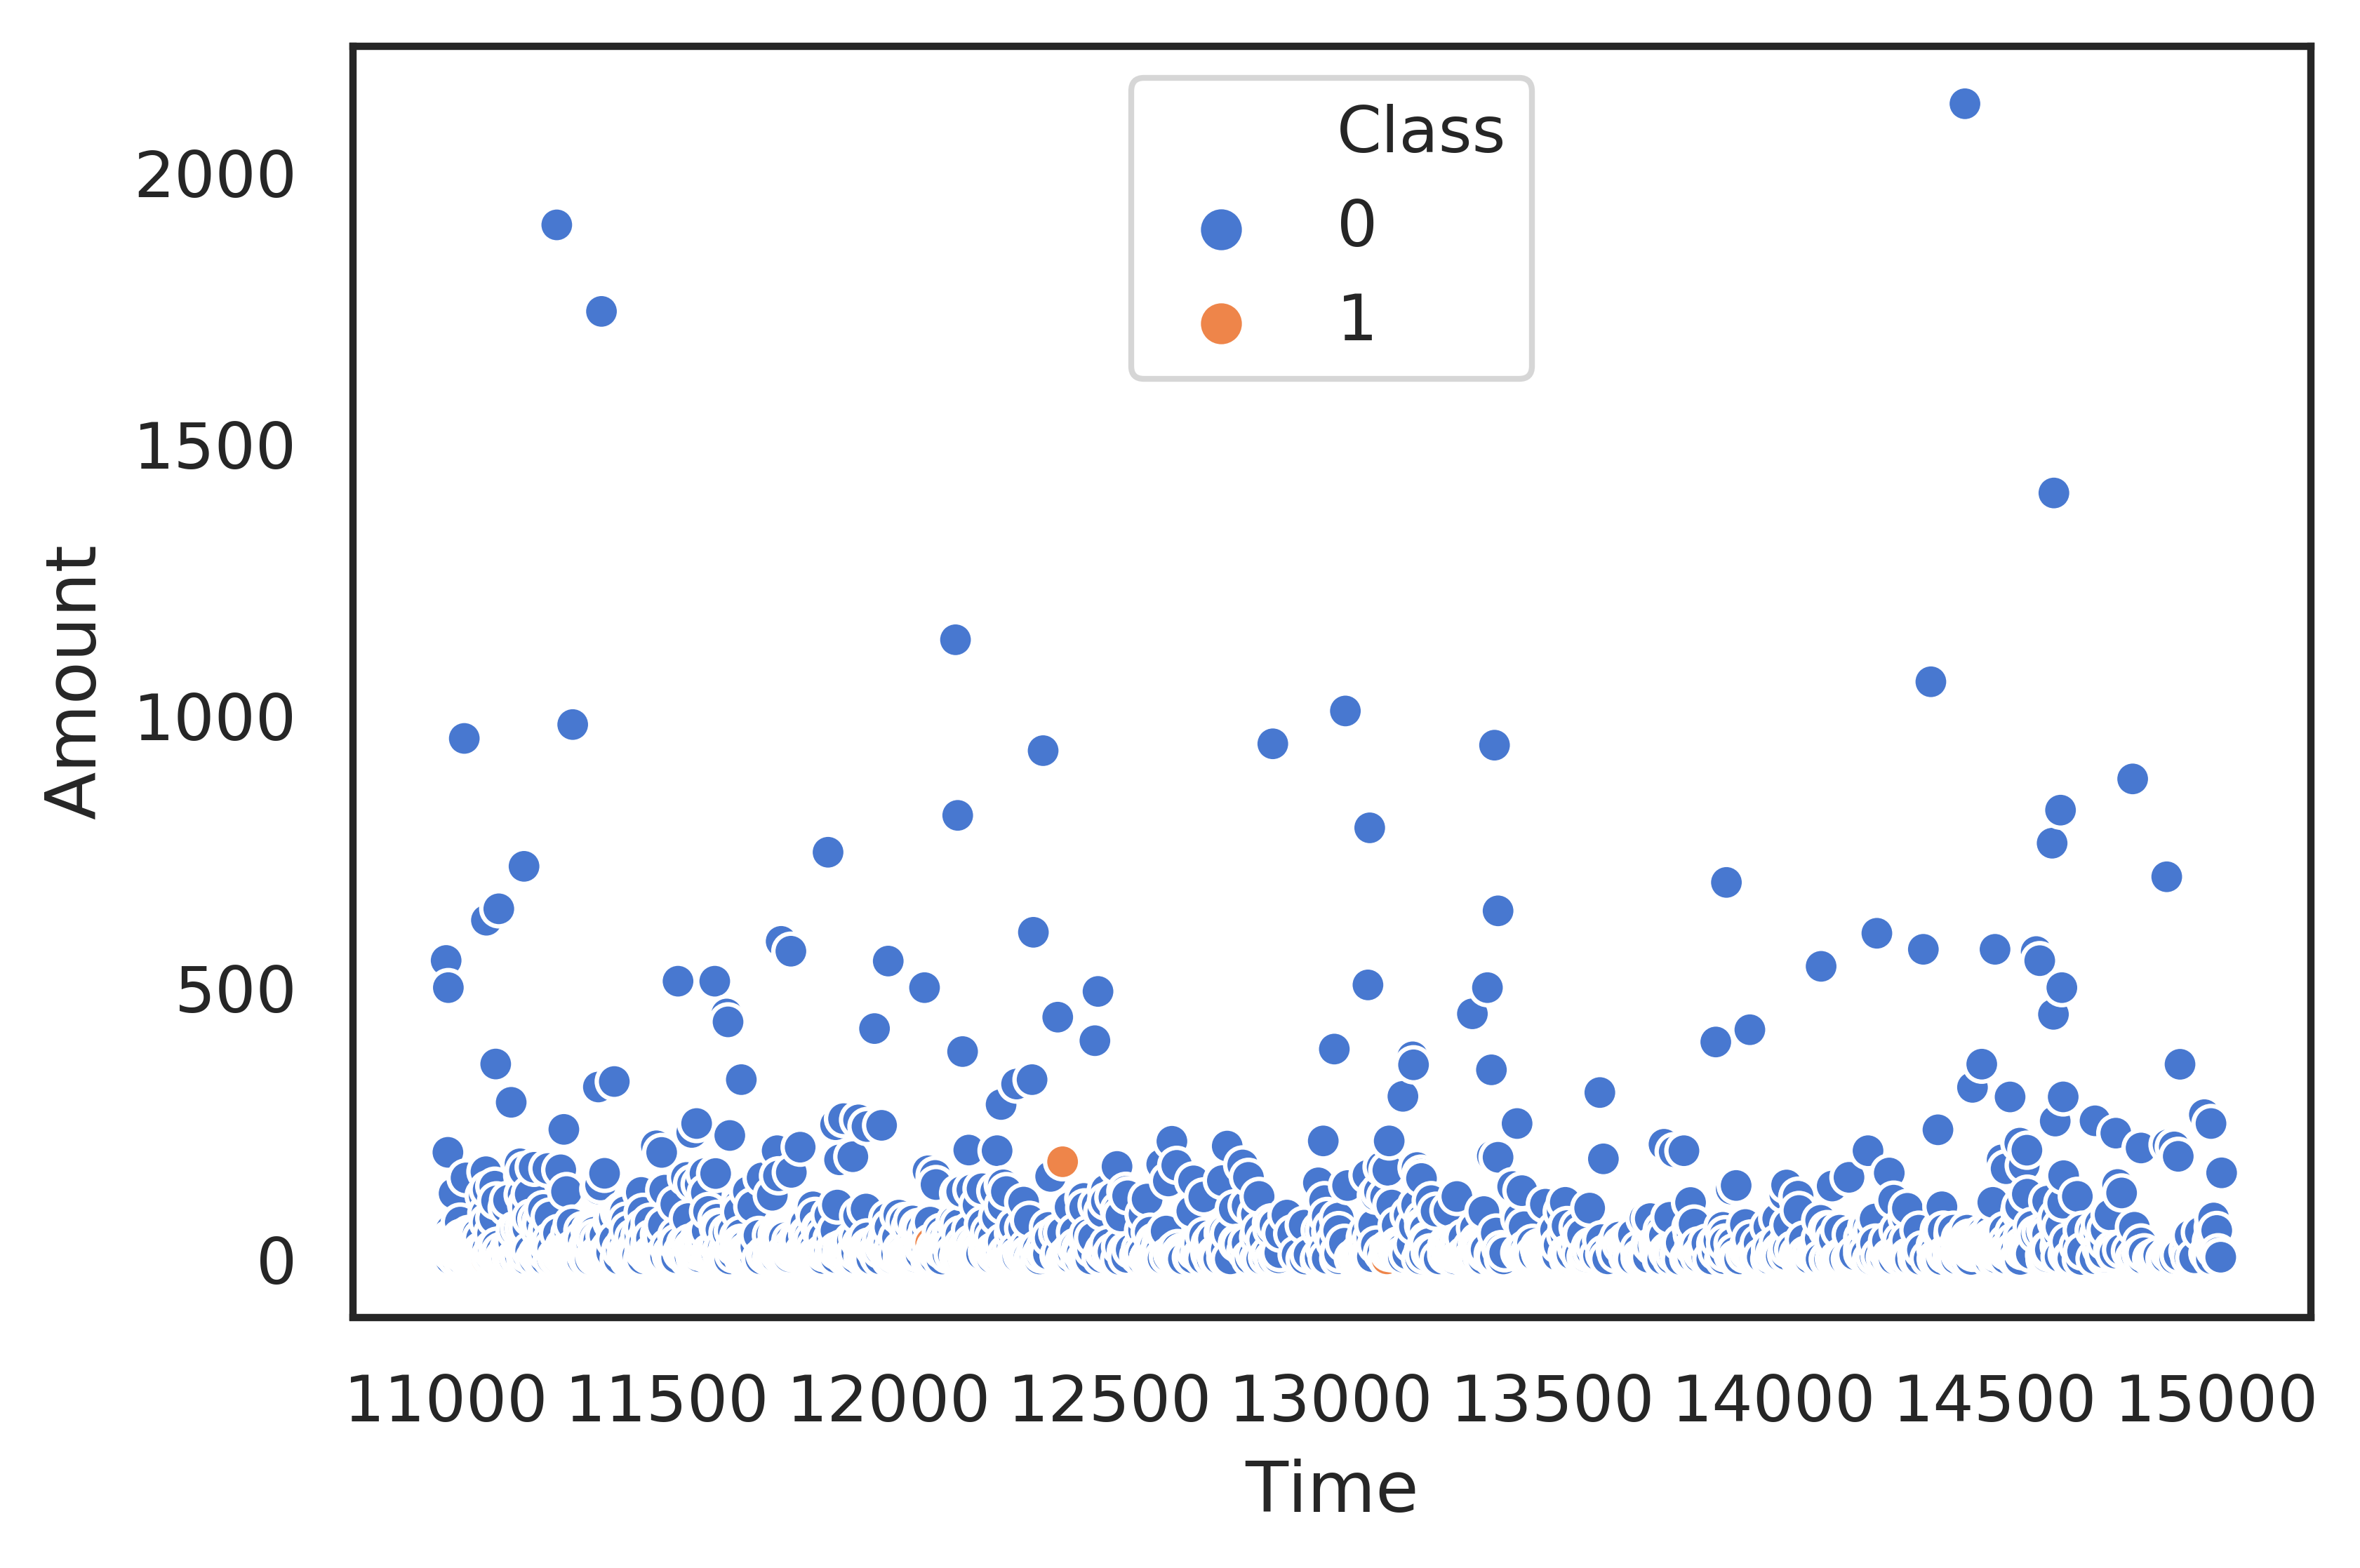

In [14]:
fig=plt.figure(dpi=600)

sns.scatterplot(x='Time',y='Amount',hue='Class',data=creditdata_info.iloc[8000:10000])
plt.plot(marker='o',markersize=0.4)

As we can see that the above class has great imbalance between count of positive values and negative values.

We need to sample the data to decrease the imbalance of the Class variable seen above. 

For this there are two tyes of sampling techniques that can be used primarily:
1. UnderSampling
2. Over Sampling.

In the following code we will explore both of these options.

1 UnderSampling is a technique in which the data with more number of samples is reduced to match the number of samples of the minority data thus reducing the undersampling.

Lets explore first a simple technique of under sampling.

In this technique we select a sample of data from the credit data and select all the samples with the Class 1 classification. To this we concatinate a sample equal number of Class 0 samples.



First find how many class 0 and class 1 sample does the data has.

In [15]:
class_0_samples=creditdata_info.loc[creditdata_info['Class']==0].count()
class_0_samples

Time      284315
V1        284315
V2        284315
V3        284315
V4        284315
V5        284315
V6        284315
V7        284315
V8        284315
V9        284315
V10       284315
V11       284315
V12       284315
V13       284315
V14       284315
V15       284315
V16       284315
V17       284315
V18       284315
V19       284315
V20       284315
V21       284315
V22       284315
V23       284315
V24       284315
V25       284315
V26       284315
V27       284315
V28       284315
Amount    284315
Class     284315
dtype: int64

In [16]:
class_0_samples=creditdata_info.loc[creditdata_info['Class']==1].count()
class_0_samples

Time      492
V1        492
V2        492
V3        492
V4        492
V5        492
V6        492
V7        492
V8        492
V9        492
V10       492
V11       492
V12       492
V13       492
V14       492
V15       492
V16       492
V17       492
V18       492
V19       492
V20       492
V21       492
V22       492
V23       492
V24       492
V25       492
V26       492
V27       492
V28       492
Amount    492
Class     492
dtype: int64

So there are 492 samples of Class 1 and 284315 samples of Class 0.

SO we use the imblearn RandomUnderSampler to reduce the imbalane between the sample.
We first shuffle the data to introduce more randomness in the sampling.


In [17]:
#shuffle data

credit_info_reshuffled_data=creditdata_info.sample(frac=1)
credit_info_reshuffled_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
204686,135393.0,2.092597,-1.146382,-2.501343,-1.332898,1.718188,3.595887,-1.043698,0.817633,-0.294935,...,-0.291366,-0.252954,0.166601,0.741730,-0.020535,0.771672,-0.030310,-0.066209,33.45,0
171529,120679.0,-1.157907,-1.051182,0.223588,-0.602691,1.466642,0.235792,0.320057,0.205414,-1.001270,...,-0.098108,-0.050176,-0.122387,-1.498669,0.631266,-0.406672,0.083309,0.139852,120.00,0
199786,133136.0,2.022955,-1.200838,0.097344,-0.600663,-1.487427,0.125530,-1.553084,0.214618,0.106277,...,-0.088816,0.207604,0.256926,-0.501664,-0.706916,0.609347,0.009747,-0.040171,35.90,0
85294,60707.0,1.198600,-0.205850,0.569940,-0.218400,-0.648338,-0.256356,-0.470923,0.188179,0.312028,...,-0.069146,-0.243497,0.129188,0.047991,-0.024773,0.920875,-0.065649,-0.006895,1.15,0
281323,170098.0,-3.202053,-5.099372,-2.826233,0.189150,5.374907,-3.839097,-0.736038,-0.081960,-0.106723,...,1.048251,1.205556,1.590229,0.254065,-1.044735,0.816392,-0.020740,0.458668,324.91,0


In [20]:
from imblearn.under_sampling import RandomUnderSampler
randomUnderSampler = RandomUnderSampler(random_state=42)

fraudulent_creditT_data,valid_creditT_data = randomUnderSampler.fit_resample(credit_info_reshuffled_data.drop(['Class'],axis=1), credit_info_reshuffled_data['Class'])

Using TensorFlow backend.


In [21]:
#concat the above data into one dat frame.

simple_under_sampled_data=pd.concat([pd.DataFrame(fraudulent_creditT_data),pd.DataFrame(valid_creditT_data)],axis=1)
simple_under_sampled_data.shape
simple_under_sampled_data.columns=creditdata_info.columns

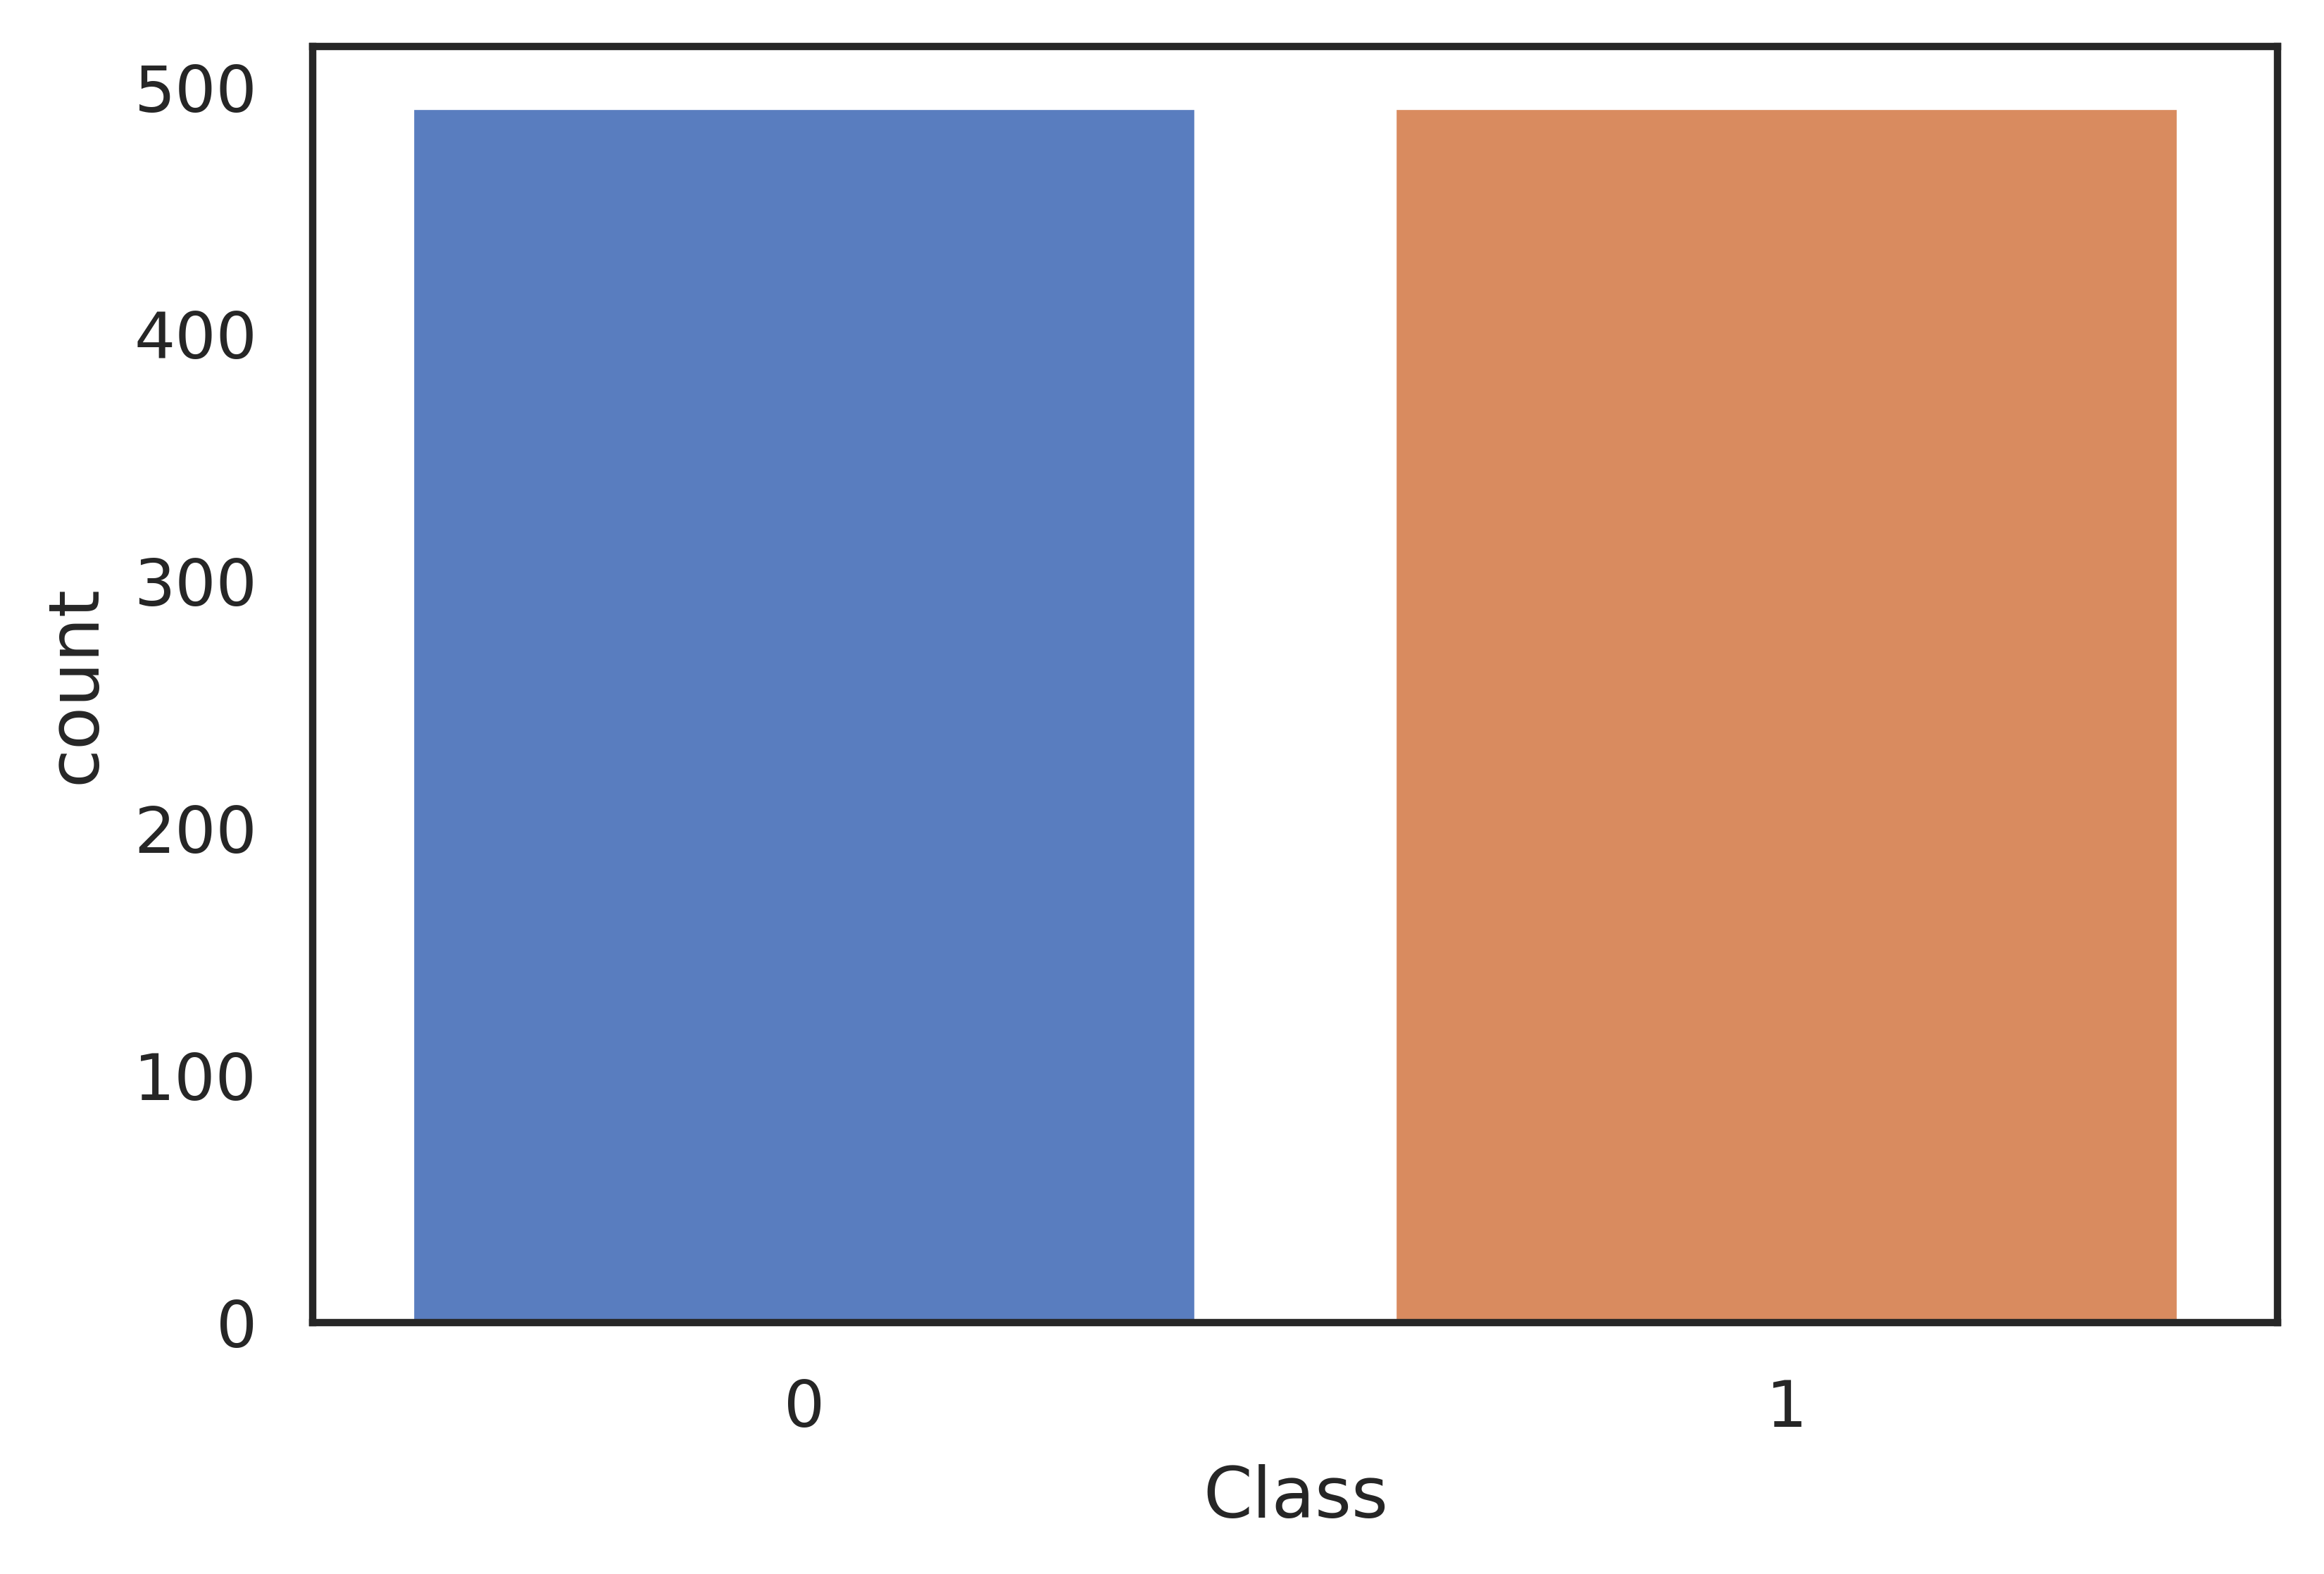

In [22]:
#plot this data
fig=plt.figure(dpi=600)
sns.countplot('Class',data=simple_under_sampled_data)

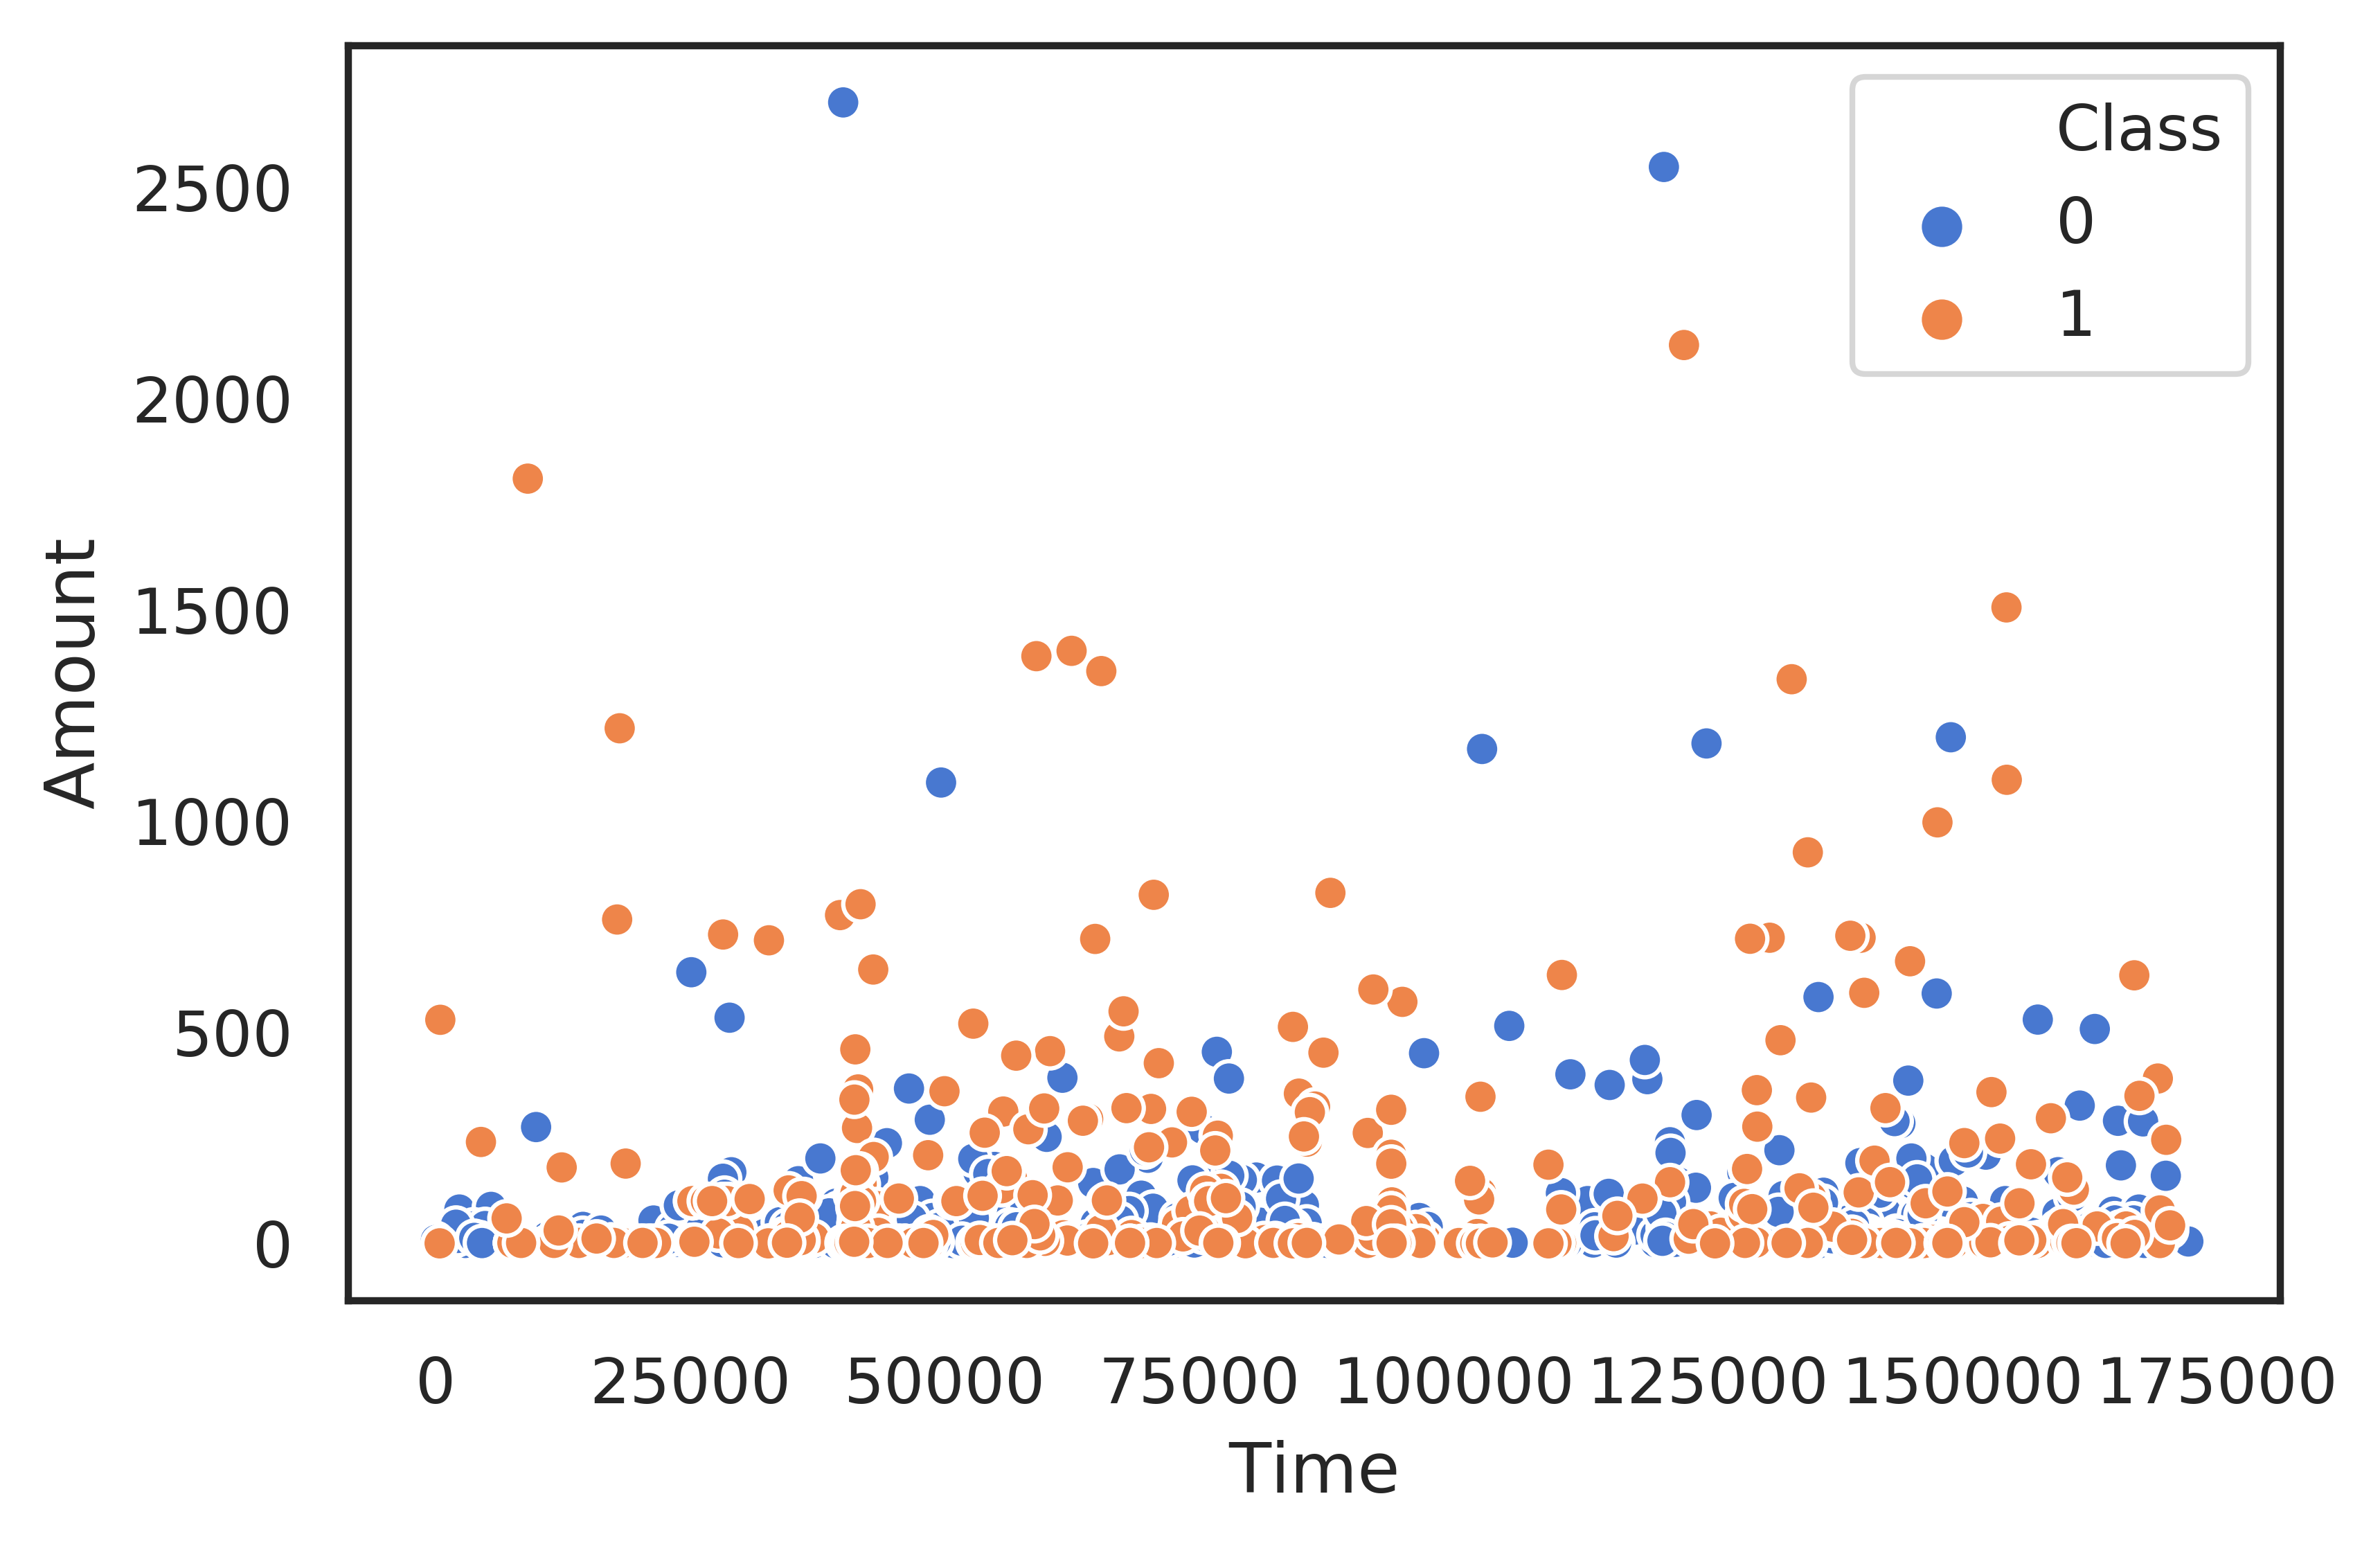

In [23]:
fig=plt.figure(dpi=600)
sns.scatterplot(x='Time',y='Amount',hue='Class',data=simple_under_sampled_data)
fig.savefig('resampled_scatter_plot.png')

Now lets apply the various machine learning algorithms to the undersampled data we created in the above steps.

We apply the following the algorithms over the Data:

Decision Tree Regressor:

Decision Tree Regressor is a non-parametric supervised learning Algorithm. It basically creates simple decision rules from the data provided to it and then predicts Class values of new inputs based on these rules.

Gaussian NB:

Gaussian NB used the Gaussian Naive Bayes Classification for classifying new inputs. 

Logistic Regression:

Logistic Regression uses a logistic function to model a binary dependent variable. 

KNeighborsClassifier:

KNeighborsClassifier is a instance based learning which does not creates any rules ut just simply stores the instances from the trainng data. Whenever a new instance is given to the classifier it classifies the new instance based on the distance it has from previously stored instance classes.


Now lets see the implementation and results of these algorithms on the undersampled data:



In [24]:
from sklearn.model_selection import train_test_split, KFold

X = simple_under_sampled_data.drop(['Class'],axis=1).values
Y = simple_under_sampled_data['Class'].values
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=25)

In [25]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print('train-set confusion matrix:\n ', confusion_matrix(y_train,train_pred))


train-set confusion matrix:
  [[367   0]
 [  0 371]]


In [26]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test,y_pred))

test-set confusion matrix:
 [[108  17]
 [ 13 108]]
recall score:  0.8925619834710744
precision score:  0.864
f1 score:  0.8780487804878049
accuracy score:  0.8780487804878049


In [27]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print('train-set confusion matrix:\n ', confusion_matrix(y_train,train_pred))

train-set confusion matrix:
  [[362   5]
 [114 257]]


In [28]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test,y_pred))

test-set confusion matrix:
 [[121   4]
 [ 33  88]]
recall score:  0.7272727272727273
precision score:  0.9565217391304348
f1 score:  0.8262910798122066
accuracy score:  0.8495934959349594


In [29]:
model = LogisticRegression(C = 0.01, penalty = 'l1')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print('train-set confusion matrix:\n ', confusion_matrix(y_train,train_pred))

train-set confusion matrix:
  [[361   6]
 [ 48 323]]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test,y_pred))

test-set confusion matrix:
 [[122   3]
 [ 16 105]]
recall score:  0.8677685950413223
precision score:  0.9722222222222222
f1 score:  0.9170305676855894
accuracy score:  0.9227642276422764


In [31]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print('train-set confusion matrix:\n ', confusion_matrix(y_train,train_pred))

train-set confusion matrix:
  [[277  90]
 [ 88 283]]


In [32]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test,y_pred))

test-set confusion matrix:
 [[84 41]
 [43 78]]
recall score:  0.6446280991735537
precision score:  0.6554621848739496
f1 score:  0.6499999999999999
accuracy score:  0.6585365853658537


Now let's see OverSampling. In the Oversampling we copy the instance of the minority class to increase the minority samples of the class data.

For this we use the imblearn library.
Reference:
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.AllKNN.html#imblearn.over_sampling

First we have the random oversampler from the imblearn library which randomly creates more samples of the data which underrepresented in the 

In [33]:
from imblearn.over_sampling import SMOTE

smote= SMOTE(random_state=47)

tempData=creditdata_info
oversampled_x,oversampled_y=smote.fit_resample(tempData.drop(['Class'],axis=1),tempData['Class'])

oversampled_data=pd.concat([pd.DataFrame(oversampled_x),pd.DataFrame(oversampled_y)],axis=1)

oversampled_data.columns=creditdata_info.columns

In [34]:
oversampled_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,167814.692371,-0.841289,2.375927,-4.067346,2.085250,-1.238730,0.078222,-0.740691,-1.820276,-1.614873,...,-0.758902,0.378156,0.104710,0.238643,0.136415,-0.394477,0.383399,0.078970,300.531812,1
568626,91901.666984,-2.520685,3.514221,-5.377436,2.017083,-0.761306,-1.081950,-2.357011,-2.352479,-0.085537,...,3.463192,-0.250186,0.520644,-0.247299,-0.257777,-0.411581,0.482029,0.330795,104.046090,1
568627,56807.600557,0.015004,2.389197,-4.187689,3.475364,-0.643989,-1.284652,-2.994013,0.757168,-1.623361,...,0.295880,-0.750919,-0.262797,-0.855557,0.933738,-0.210533,0.872500,0.468794,1.079040,1
568628,70603.140286,-2.393210,-0.370738,-2.698586,2.437519,-3.991112,0.120109,-0.251730,0.881090,-1.269510,...,1.095762,0.563905,1.602619,0.312800,0.472583,-0.202116,0.339396,0.244386,771.005646,1


In [35]:
oversampled_data.shape

(568630, 31)

In [36]:
oversampled_data_Class0_samples=oversampled_data.loc[oversampled_data['Class']==0]

oversampled_data_Class0_samples.shape

(284315, 31)

In [37]:
oversampled_data_Class1_samples=oversampled_data.loc[oversampled_data['Class']==1]
oversampled_data_Class1_samples.shape

(284315, 31)

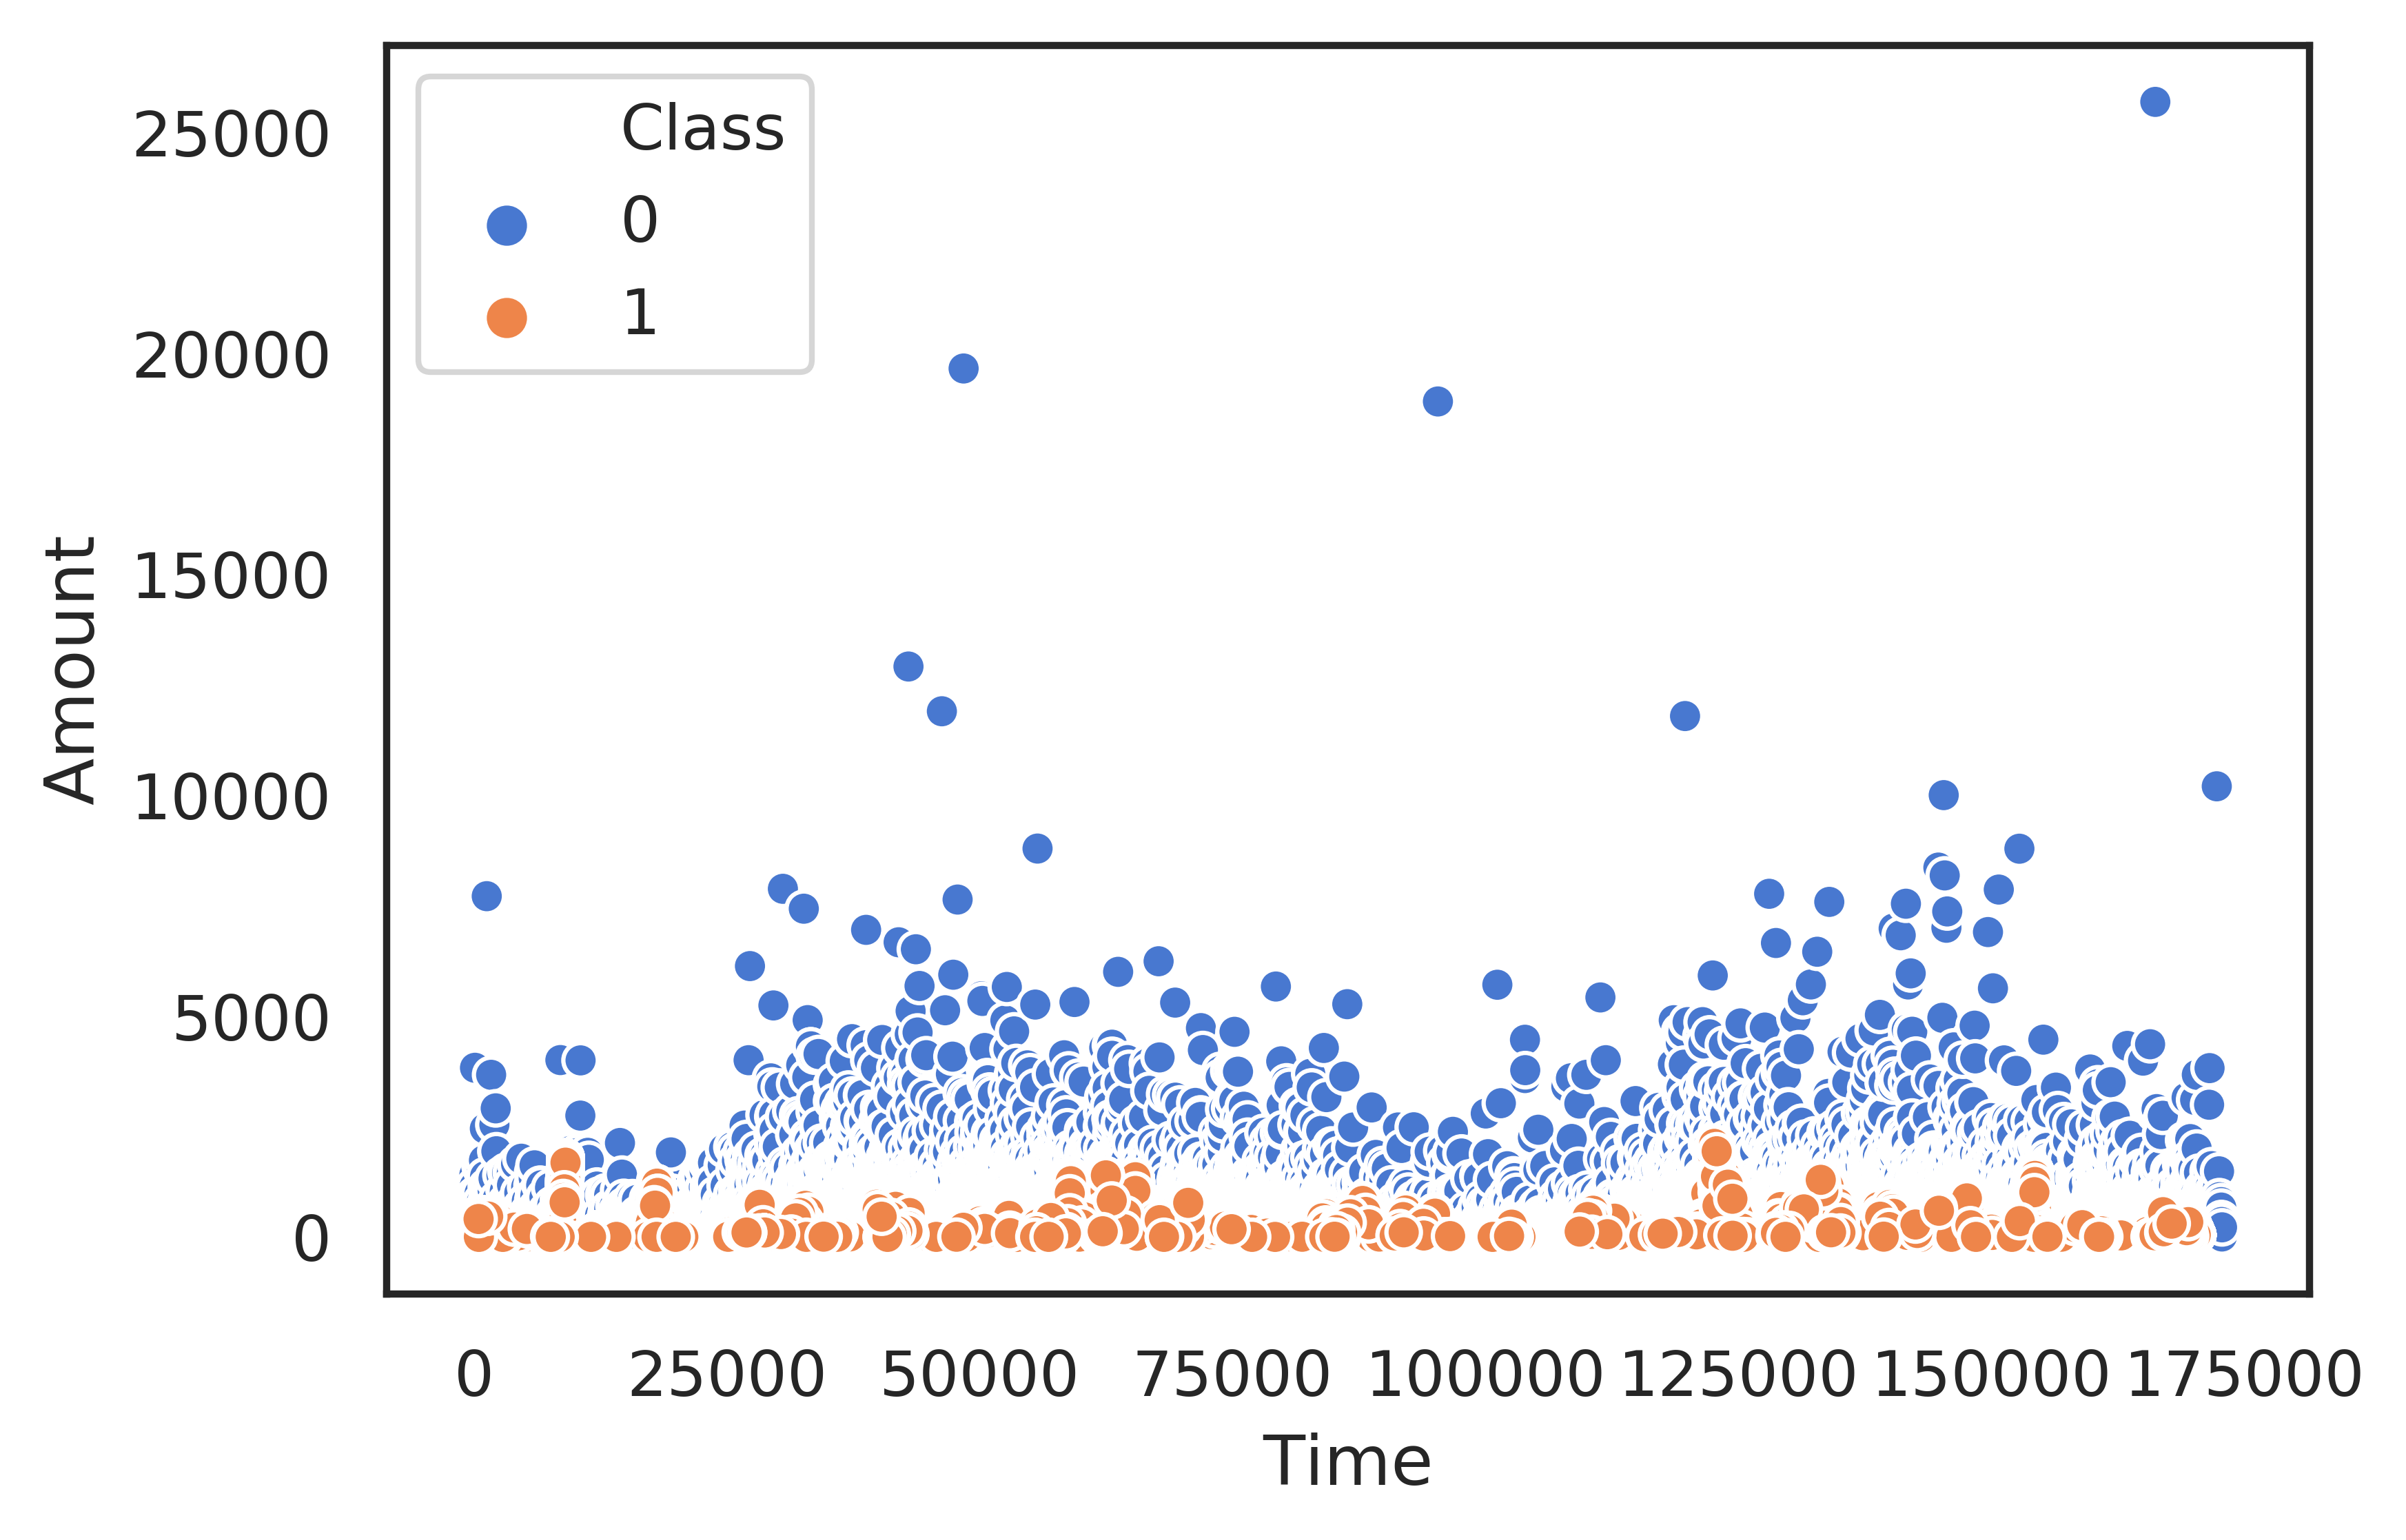

In [38]:
fig=plt.figure(dpi=600)
sns.scatterplot(x='Time',y='Amount',hue='Class',data=oversampled_data)
fig.savefig('oversampled_scatter_plot.png')

We apply the same type of algorithms we applied to the undersampled mode and train models and check the performance of the models on this over sampled data set. Our main aim here is to compare the performances of different classification algorithms on this oversampled data set.

In [1]:
models = ["LinearRegression", 
          "DecisionTree", 
          "GaussianNB",
          "LogisticRegression",
          "KNeighbours"
         ]

In [40]:
from sklearn.model_selection import train_test_split, KFold

X = oversampled_data.drop(['Class'],axis=1).values
Y = oversampled_data['Class'].values
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=25)

In [41]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print('train-set confusion matrix:\n ', confusion_matrix(y_train,train_pred))


train-set confusion matrix:
  [[212860      0]
 [     0 213612]]


In [42]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test,y_pred))

test-set confusion matrix:
 [[71285   170]
 [   47 70656]]
recall score:  0.9993352474435314
precision score:  0.9975997515036851
f1 score:  0.9984667453313455
accuracy score:  0.9984735294531437


In [43]:
#GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print('train-set confusion matrix:\n ', confusion_matrix(y_train,train_pred))

train-set confusion matrix:
  [[211328   1532]
 [ 54904 158708]]


In [44]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test,y_pred))

test-set confusion matrix:
 [[70933   522]
 [18196 52507]]
recall score:  0.7426417549467491
precision score:  0.9901563295555262
f1 score:  0.8487214301878254
accuracy score:  0.8683296050872973


In [45]:
#Logistic Regression 
model = LogisticRegression(C = 0.01, penalty = 'l1')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print('train-set confusion matrix:\n ', confusion_matrix(y_train,train_pred))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train-set confusion matrix:
  [[210979   1881]
 [  6864 206748]]


In [46]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test,y_pred))

test-set confusion matrix:
 [[70830   625]
 [ 2207 68496]]
recall score:  0.9687849171888039
precision score:  0.9909578854472592
f1 score:  0.9797459663577068
accuracy score:  0.9800785041995526


In [47]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print('train-set confusion matrix:\n ', confusion_matrix(y_train,train_pred))

train-set confusion matrix:
  [[205007   7853]
 [  2783 210829]]


In [48]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test,y_pred))

test-set confusion matrix:
 [[67567  3888]
 [ 1624 69079]]
recall score:  0.9770306776232974
precision score:  0.9467156385763428
f1 score:  0.961634300828287
accuracy score:  0.9612262412245529
